In [1]:
import ROOT
import os
from my_utils import *
import fst

import phidrive
import micos_eco

data_dir = make_data_dir()



# Load the library and include the header file
from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "/workdir/my_event.h"')
#gSystem.Load('my_')

# then you can starting the fastjet class directly....
#from ROOT import fastjet
#jet = fastjet.PseudoJet( 99.0, 0.1, 0, 100.0)
#print jet.E()




Welcome to JupyROOT 6.14/04


0

In [2]:
##################################################
##   clear data dir, copy root file             ##
##################################################

#fst.take_data(events=500)
#fst.take_data(time=10)

## new data or existing data?

if False:
#if True:
  clear_data_dir()
  os.system("cp /workdir/joint_tree.root {:s}/".format(data_dir))

In [3]:
##################################################
##               slurp root file                ##
##################################################

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

f = ROOT.TFile("{:s}/joint_tree.root".format(data_dir))
tree = f.Get("joint_tree")

#c.Draw()

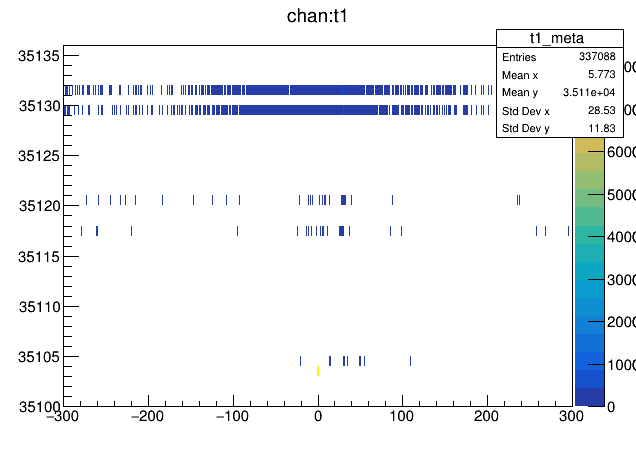

In [4]:
##################################################
##             overview TDC 0x0351              ##
##################################################


tdc=351
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

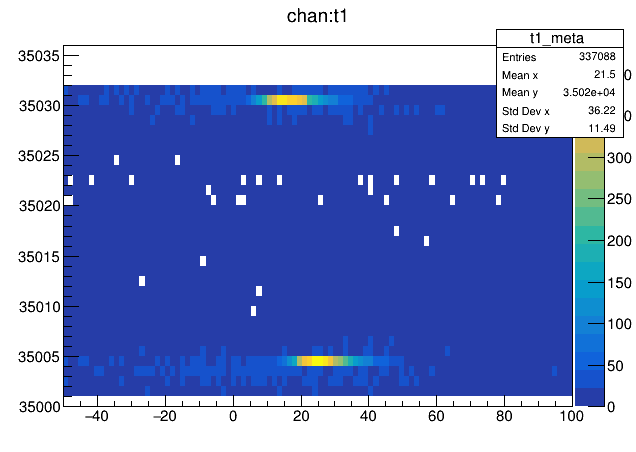

In [5]:
##################################################
##             overview TDC 0x0350              ##
##################################################


tdc=350
disp_channels = 36
tree.Draw("chan:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

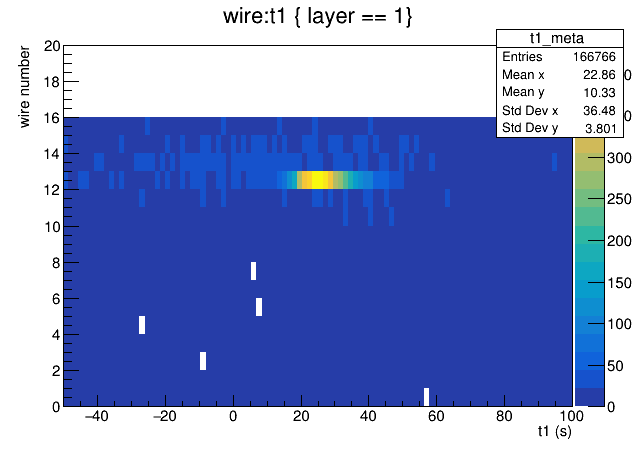

In [6]:
##################################################
##                   layer 1                    ##
##################################################

layer = 1
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

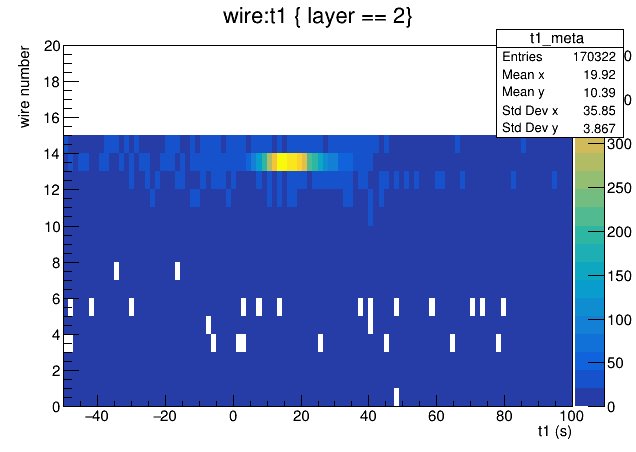

In [7]:
##################################################
##                   layer 2                    ##
##################################################

layer = 2
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

In [8]:
##################################################
##            read root tree example            ##
##################################################



## variables that will be filled from root tree:
last_evt = 0

entries = tree.GetEntries()
print("tree has {:d} entries".format(entries))

processed_tracks = 0




#for i in range(0,entries):
for i in range(0,20):
  
  tree.GetEntry(i)
  this_event = tree.event
  hits = this_event.hits
  print(hits.size())
  #this_event.hits
  #hits = this_event.hits 
  #print("event: {:d}".format(evt))

    

    
    
#  
#  
#  if evt > last_evt: 
#    ava_c_cell_c_garfield_fft = fft_convolve(time,[ava_c_cell_fft,garfield_signal])
#    garfield_signal = np.zeros(len(time)) # clear accumulator
#    processed_tracks += 1
#    print("new track at index {:d}".format(i))
#    print("processed tracks: {:d}".format(processed_tracks))
#    if plot_n_tracks:
#      plt.plot(time_ns,ava_c_cell_c_garfield_fft*1e3, plot_opt, label="signal {:03d}".format(processed_tracks), alpha=plot_alpha )
#    if( processed_tracks >= plot_n_tracks):
#      break
#    
#    
#  if(tree.hit_wire == hit_wire): # we hit the selected sense wire (default = 1)
#    index = int(tree.e_drift_t/delta_t)
#    garfield_signal[index] += 1/delta_t # fill one unit of particle into sample time slice
#  
#  
#  
#  last_evt = tree.evt
  

    

tree has 16988 entries
33
16
29
32
31
12
7
32
30
8
11
8
6
32
13
30
31
15
32
12


In [9]:
archive(label="bak")